In [1419]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as db
from sqlalchemy import create_engine
import sqlite3 as sql
import glob
import os


In [1420]:
data = pd.read_csv(r'C:\Users\Muhammad Luqman\DLMDSPWP01_Python Assigment\ideal.csv')
testdata=pd.read_csv(r'C:\Users\Muhammad Luqman\DLMDSPWP01_Python Assigment\test.csv')
traindata=pd.read_csv(r'C:\Users\Muhammad Luqman\DLMDSPWP01_Python Assigment\train.csv')

In [1421]:
data.head(5)

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902


In [1422]:
def RegFuncTrain(yf):
    yt='y'+str(yf)
    print("train data"+' '+ yt)
    xdata=traindata['x'].values.reshape((-1, 1))
    ydata=traindata['y'+str(yf)].values.reshape((-1, 1))
    
    modelf=LinearRegression()
    modelf.fit(xdata, ydata)
    r_sqf = modelf.score(xdata, ydata)
    print(f"coefficient of determination: {r_sqf}")
    print(f"intercept: {modelf.intercept_}")
    print(f"slope: {modelf.coef_}")
    value=str(yt)
    
    new_values = {value: modelf.coef_}
    dict.update(new_values)
    print('***************#####*************************')

In [1423]:
for index in range(traindata.shape[1]):
    #print('Column Number : ', index)
    if(index!=0):  
         i=str(index)  
         RegFuncTrain(i)
         

train data y1
coefficient of determination: 0.00019571498781389973
intercept: [-4.22459759]
slope: [[0.00223288]]
***************#####*************************
train data y2
coefficient of determination: 0.004991128905301956
intercept: [-9.98142663]
slope: [[0.00462345]]
***************#####*************************
train data y3
coefficient of determination: 0.00013112048399355203
intercept: [1999.93602143]
slope: [[-2.24905425]]
***************#####*************************
train data y4
coefficient of determination: 0.841098589217265
intercept: [-8.02665288]
slope: [[241.00205648]]
***************#####*************************


In [1424]:
dict

{'y1': array([[0.00223288]]),
 'y2': array([[0.00462345]]),
 'y3': array([[-2.24905425]]),
 'y4': array([[241.00205648]])}

#End of trained data regression  ***************

******

# regression function for ideal csv file

In [1425]:
def Regfunc(yf):
    #stringx= str(xf)
    #stringy=str(yf)
    #xdata=traindata[xf].values.reshape((-1, 1))
    #ydata=traindata[yf].values.reshape((-1, 1))
    #print(xf)
    yt='y'+str(yf)
    print("ideal data"+' '+ yt)
    xdata=data['x'].values.reshape((-1, 1))
    ydata=data['y'+str(yf)].values.reshape((-1, 1))
    
    modelf=LinearRegression()
    modelf.fit(xdata, ydata)
    r_sqf = modelf.score(xdata, ydata)
    print(f"coefficient of determination: {r_sqf}")
    print(f"intercept: {modelf.intercept_}")
    print(f"slope: {modelf.coef_}")
    plt.scatter(xdata, ydata, color='blue')
    plt.plot(xdata, modelf.coef_ * xdata + modelf.intercept_, color='red')
    plt.xlabel('x')
    plt.ylabel(yt)
    plt.show()
    print('***************#####*************************')
    
    

ideal data y1
coefficient of determination: 0.0020047676062527886
intercept: [-0.00241818]
slope: [[-0.0027163]]


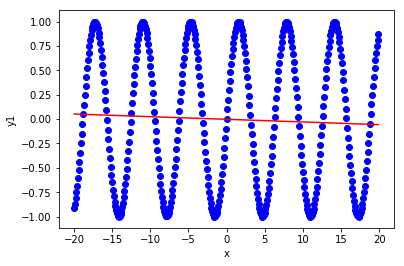

***************#####*************************
ideal data y2
coefficient of determination: 4.857059791252283e-06
intercept: [0.04560242]
slope: [[-0.00013593]]


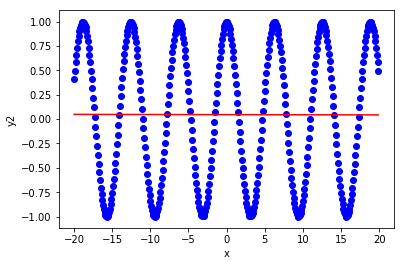

***************#####*************************
ideal data y3
coefficient of determination: 0.0020047641497378255
intercept: [9.99758182]
slope: [[-0.0027163]]


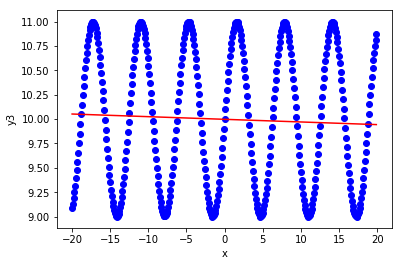

***************#####*************************
ideal data y4
coefficient of determination: 4.8570574092687835e-06
intercept: [5.04560244]
slope: [[-0.00013593]]


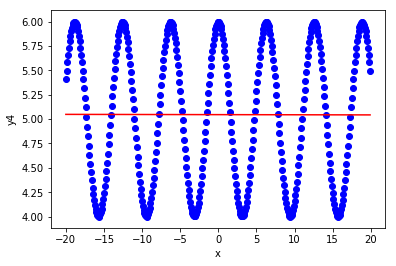

***************#####*************************
ideal data y5
coefficient of determination: 0.0020047641497378255
intercept: [-9.99758182]
slope: [[0.0027163]]


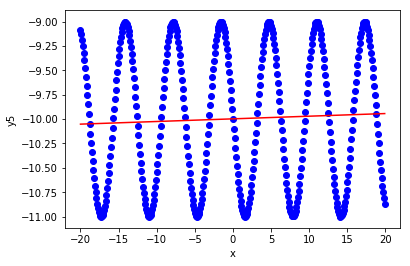

***************#####*************************
ideal data y6
coefficient of determination: 0.0020047676062527886
intercept: [0.00241818]
slope: [[0.0027163]]


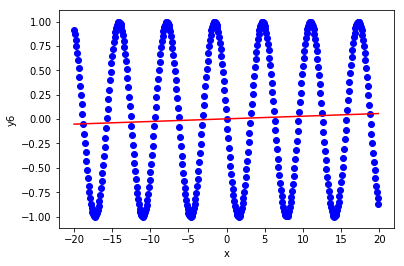

***************#####*************************
ideal data y7
coefficient of determination: 2.2208285635594294e-05
intercept: [-0.05437607]
slope: [[0.00029426]]


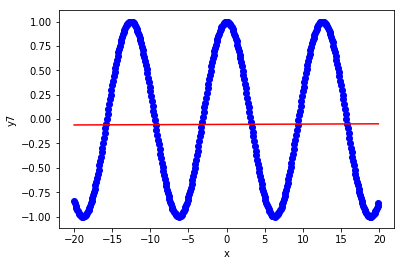

***************#####*************************
ideal data y8
coefficient of determination: 2.8357350536523107e-05
intercept: [0.03074253]
slope: [[0.00033062]]


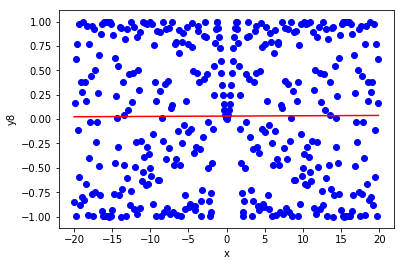

***************#####*************************
ideal data y9
coefficient of determination: 4.857059798024643e-06
intercept: [0.09120484]
slope: [[-0.00027186]]


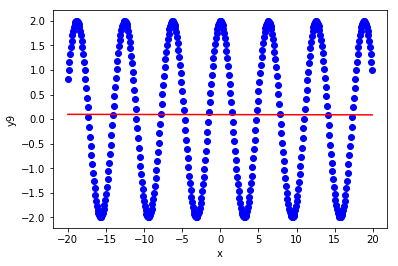

***************#####*************************
ideal data y10
coefficient of determination: 0.00010320496072357965
intercept: [-0.36240578]
slope: [[-0.0069829]]


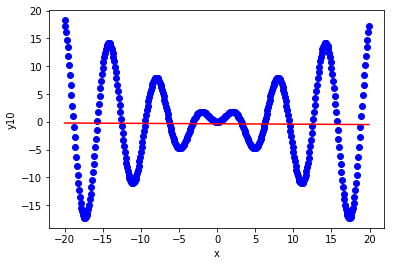

***************#####*************************
ideal data y11
coefficient of determination: 1.0
intercept: [-2.77555756e-17]
slope: [[1.]]


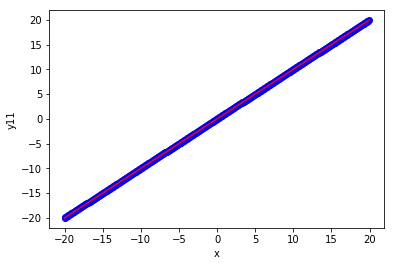

***************#####*************************
ideal data y12
coefficient of determination: 1.0
intercept: [2.]
slope: [[3.]]


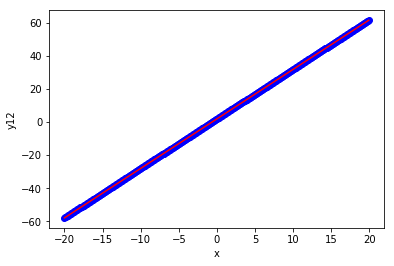

***************#####*************************
ideal data y13
coefficient of determination: 1.0
intercept: [-5.]
slope: [[2.]]


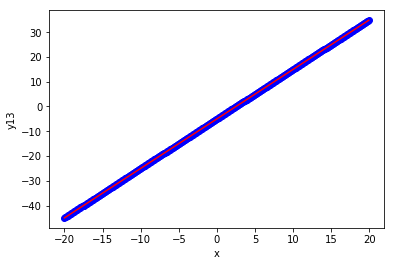

***************#####*************************
ideal data y14
coefficient of determination: 1.0
intercept: [2.77555756e-17]
slope: [[-1.]]


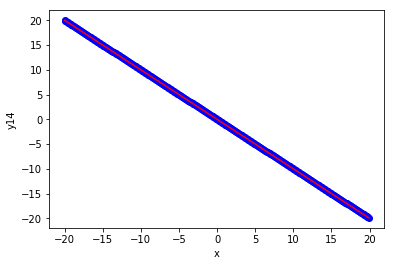

***************#####*************************
ideal data y15
coefficient of determination: 1.0
intercept: [3.]
slope: [[-0.5]]


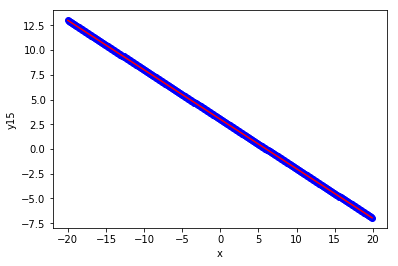

***************#####*************************
ideal data y16
coefficient of determination: 9.374355513058764e-05
intercept: [133.33]
slope: [[-0.1]]


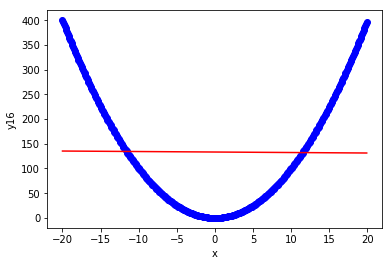

***************#####*************************
ideal data y17
coefficient of determination: 9.374355513058764e-05
intercept: [-133.33]
slope: [[0.1]]


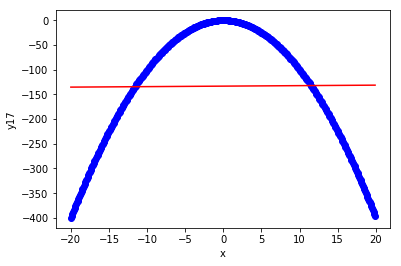

***************#####*************************
ideal data y18
coefficient of determination: 9.374355513058764e-05
intercept: [266.66]
slope: [[-0.2]]


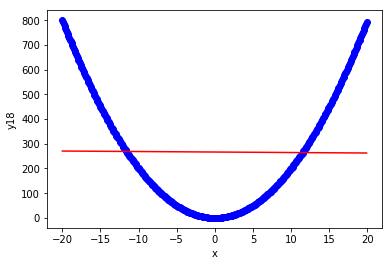

***************#####*************************
ideal data y19
coefficient of determination: 9.374355513058764e-05
intercept: [143.33]
slope: [[-0.1]]


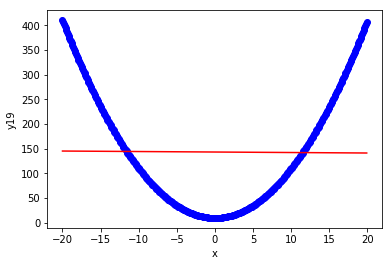

***************#####*************************
ideal data y20
coefficient of determination: 0.24605227815711725
intercept: [142.33]
slope: [[5.9]]


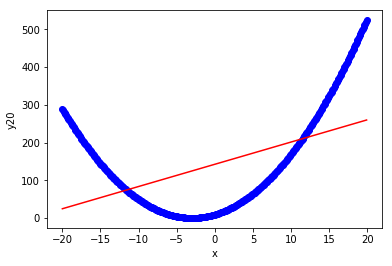

***************#####*************************
ideal data y21
coefficient of determination: 0.8399860012832634
intercept: [-7.9998]
slope: [[240.004]]


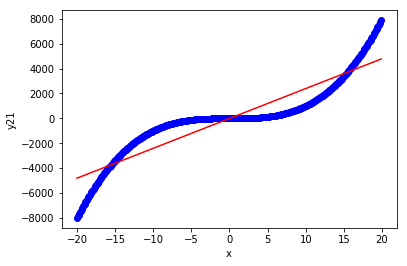

***************#####*************************
ideal data y22
coefficient of determination: 0.00013123332249254105
intercept: [1999.93750023]
slope: [[-2.24999531]]


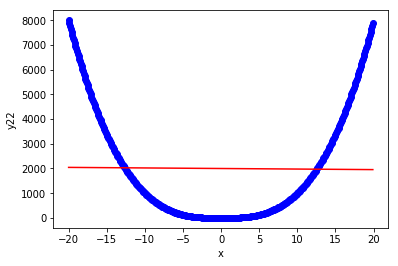

***************#####*************************
ideal data y23
coefficient of determination: 0.8399860012832634
intercept: [7.9998]
slope: [[-240.004]]


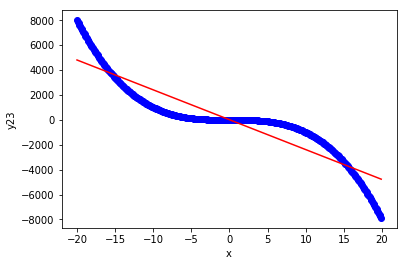

***************#####*************************
ideal data y24
coefficient of determination: 0.8399860012832634
intercept: [-15.9996]
slope: [[480.008]]


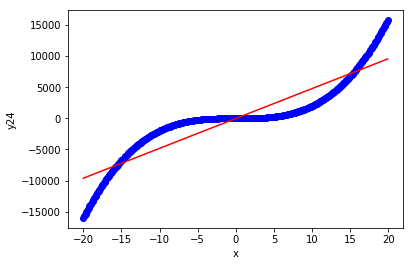

***************#####*************************
ideal data y25
coefficient of determination: 0.839986000567083
intercept: [-18.99939993]
slope: [[720.0120014]]


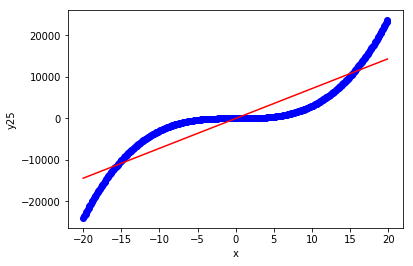

***************#####*************************
ideal data y26
coefficient of determination: 0.8121313169703308
intercept: [799.9802]
slope: [[251.404]]


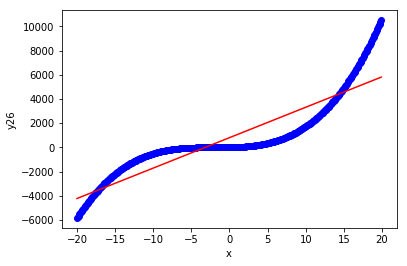

***************#####*************************
ideal data y27
coefficient of determination: 0.8096161951744003
intercept: [815.9798]
slope: [[-252.604]]


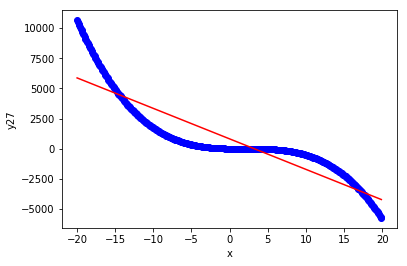

***************#####*************************
ideal data y28
coefficient of determination: 0.8411005773350927
intercept: [-7.9998]
slope: [[241.004]]


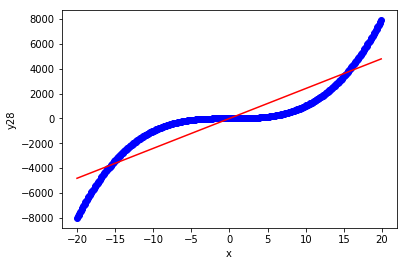

***************#####*************************
ideal data y29
coefficient of determination: 0.8389598348777213
intercept: [125.3302]
slope: [[239.904]]


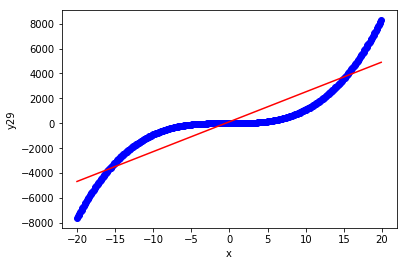

***************#####*************************
ideal data y30
coefficient of determination: 0.8342490736241457
intercept: [-269.6598]
slope: [[240.204]]


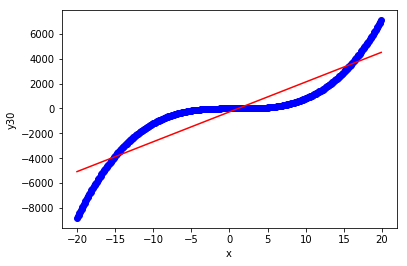

***************#####*************************
ideal data y31
coefficient of determination: 5.6247539187759266e-05
intercept: [9.9998125]
slope: [[-0.00375002]]


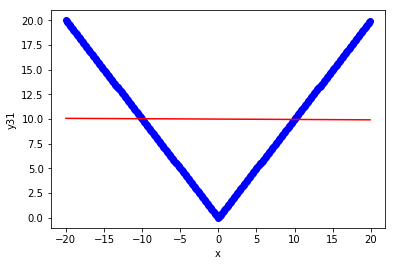

***************#####*************************
ideal data y32
coefficient of determination: 3.7451417776335205e-05
intercept: [2.98107198]
slope: [[-0.00055914]]


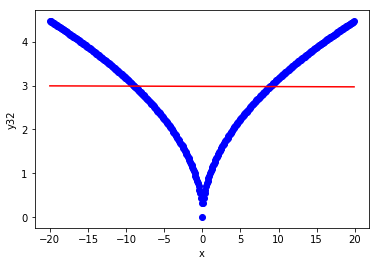

***************#####*************************
ideal data y33
coefficient of determination: 5.943575558398084e-05
intercept: [10.42307429]
slope: [[-0.00363803]]


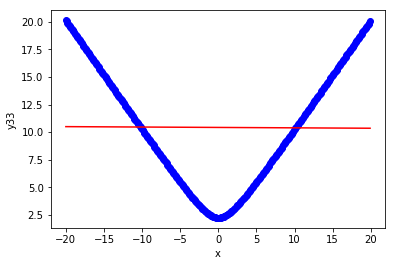

***************#####*************************
ideal data y34
coefficient of determination: 0.0014502603741028963
intercept: [0.5068711]
slope: [[-0.00258776]]


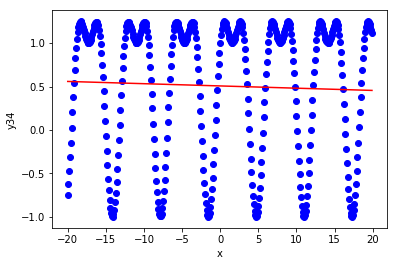

***************#####*************************
ideal data y35
coefficient of determination: 5.6247539187759266e-05
intercept: [-0.0001875]
slope: [[-0.00375002]]


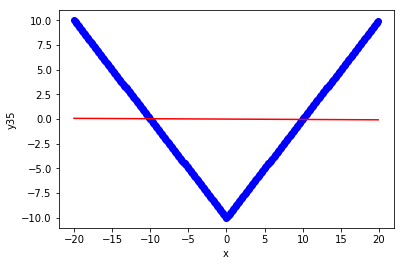

***************#####*************************
ideal data y36
coefficient of determination: 5.624753918787029e-05
intercept: [49.99906249]
slope: [[-0.01875012]]


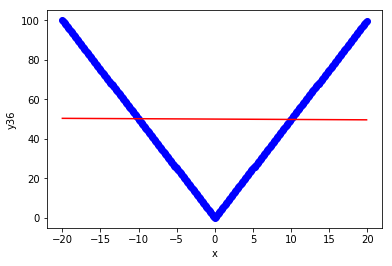

***************#####*************************
ideal data y37
coefficient of determination: 5.6247539187759266e-05
intercept: [-9.9998125]
slope: [[0.00375002]]


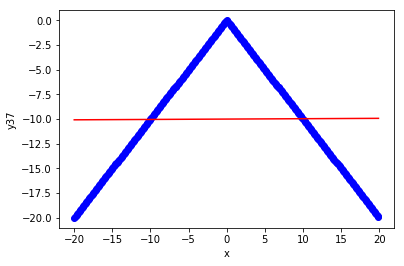

***************#####*************************
ideal data y38
coefficient of determination: 0.0008881510614097143
intercept: [-0.0480206]
slope: [[-0.00258037]]


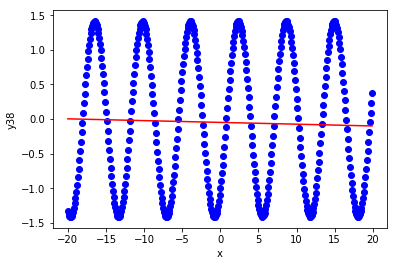

***************#####*************************
ideal data y39
coefficient of determination: 9.891043666765408e-05
intercept: [133.32758161]
slope: [[-0.10271627]]


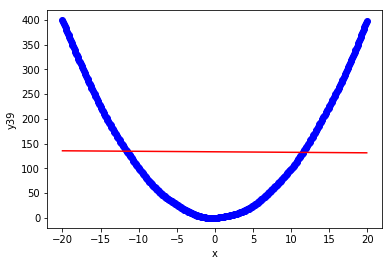

***************#####*************************
ideal data y40
coefficient of determination: 0.7914223688833109
intercept: [233.28439776]
slope: [[-20.09986405]]


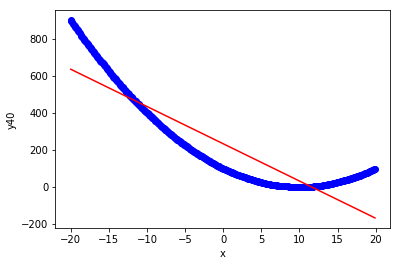

***************#####*************************
ideal data y41
coefficient of determination: 0.9997701793201665
intercept: [-0.00120909]
slope: [[1.99864185]]


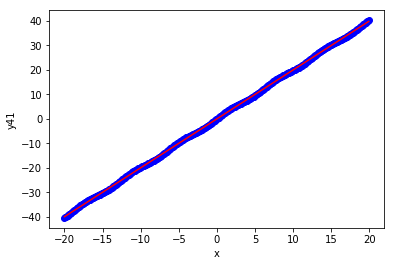

***************#####*************************
ideal data y42
coefficient of determination: 0.999762321114343
intercept: [0.02280114]
slope: [[-2.00006797]]


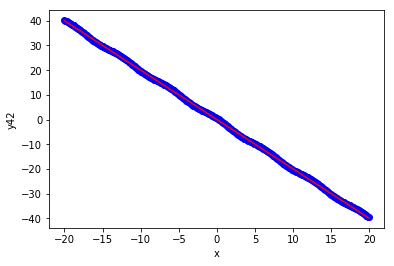

***************#####*************************
ideal data y43
coefficient of determination: 6.435668869153587e-06
intercept: [1.93384302]
slope: [[-0.0003982]]


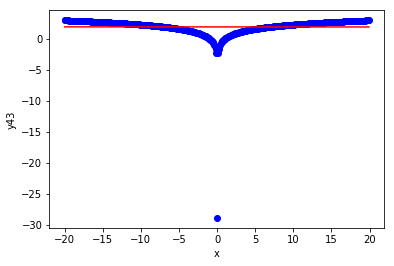

***************#####*************************
ideal data y44
coefficient of determination: 0.9891237946858742
intercept: [-0.01013654]
slope: [[-0.00010237]]


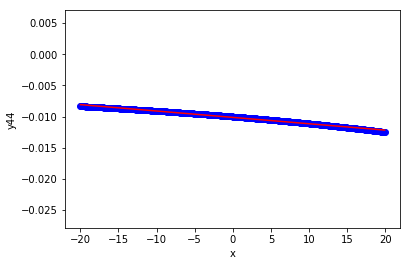

***************#####*************************
ideal data y45
coefficient of determination: 6.435665865445194e-06
intercept: [11.93384297]
slope: [[-0.0003982]]


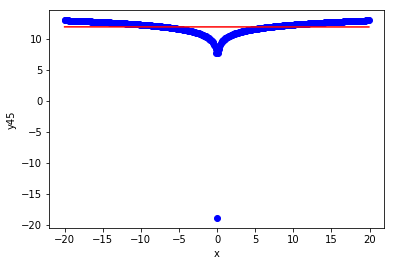

***************#####*************************
ideal data y46
coefficient of determination: 6.435669073656669e-06
intercept: [4.23642812]
slope: [[-0.0003982]]


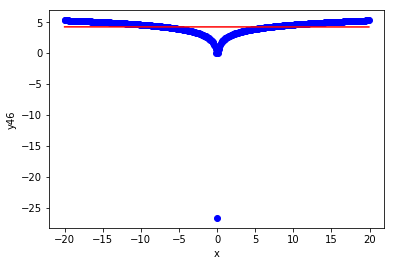

***************#####*************************
ideal data y47
coefficient of determination: 6.435669073656669e-06
intercept: [-4.23642812]
slope: [[0.0003982]]


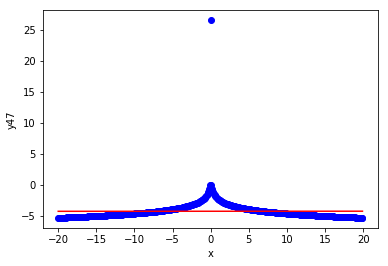

***************#####*************************
ideal data y48
coefficient of determination: 0.0017292728575807326
intercept: [-0.00043367]
slope: [[0.00064052]]


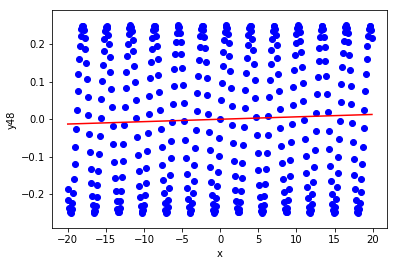

***************#####*************************
ideal data y49
coefficient of determination: 2.9870097893569536e-05
intercept: [0.02955467]
slope: [[-0.00033127]]


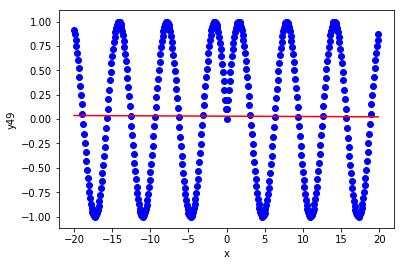

***************#####*************************
ideal data y50
coefficient of determination: 6.057904105349898e-06
intercept: [0.04032882]
slope: [[-0.00013369]]


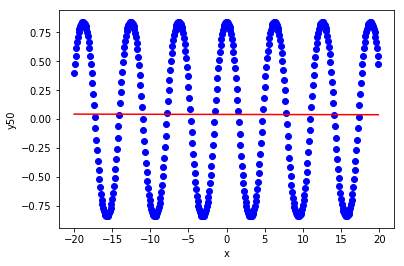

***************#####*************************


In [1426]:
for index in range(data.shape[1]):
    #print('Column Number : ', index)
    if(index!=0):  
         i=str(index)
         Regfunc(i)

In [1427]:
def RegFuncTry(yf):
    yt='y'+str(yf)
    print("train data"+' '+ yt)
    xdata=traindata['x'].values.reshape((-1, 1))
    ydata=traindata['y'+str(yf)].values.reshape((-1, 1))
   
    modelf=LinearRegression()
    modelf.fit(xdata, ydata)
    r_sqf = modelf.score(xdata, ydata)
    print(f"coefficient of determination: {r_sqf}")
    print(f"intercept: {modelf.intercept_}")
    print(f"slope: {modelf.coef_}")
    plt.scatter(xdata, ydata, color='blue')
    plt.plot(xdata, modelf.coef_ * xdata + modelf.intercept_, color='red')
    plt.xlabel('x')
    plt.ylabel(yt)
    plt.show()
    print('***************#####*************************')   

train data y1
coefficient of determination: 0.00019571498781389973
intercept: [-4.22459759]
slope: [[0.00223288]]


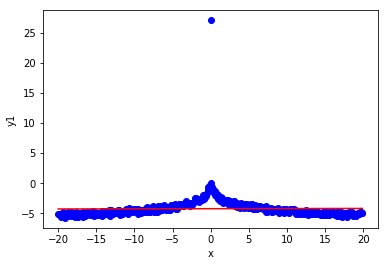

***************#####*************************
train data y2
coefficient of determination: 0.004991128905301956
intercept: [-9.98142663]
slope: [[0.00462345]]


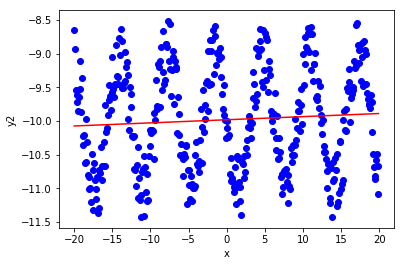

***************#####*************************
train data y3
coefficient of determination: 0.00013112048399355203
intercept: [1999.93602143]
slope: [[-2.24905425]]


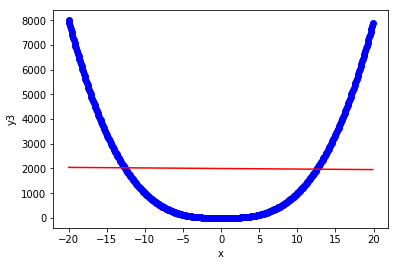

***************#####*************************
train data y4
coefficient of determination: 0.841098589217265
intercept: [-8.02665288]
slope: [[241.00205648]]


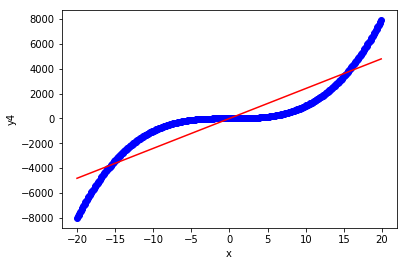

***************#####*************************


In [1428]:
for index in range(traindata.shape[1]):
    #print('Column Number : ', index)
    if(index!=0):  
         i=str(index)
         RegFuncTry(i)

In [1429]:
#training data  Y1,            Y2,                     Y3,                   Y4
#             [0.00223288], [0.00462345],        [-2.24905425],            [241.00205648]
#ideal data     Y5,Y21 ,y13          Y37,or y5           Y22,                   Y28
#              [0.0027163], [0.00375002],      [-2.249995312470703],       [241.0]

In [1430]:
xv = traindata['x'].values.reshape((-1, 1))
yv1= traindata['y1'].values.reshape((-1, 1))
yv2= traindata['y2'].values.reshape((-1, 1))
yv3= traindata['y3'].values.reshape((-1, 1))
yv4= traindata['y4'].values.reshape((-1, 1))

testXv=testdata['x'].values.reshape((-1,1))
testYv=testdata['y'].values.reshape((-1,1))


In [1431]:
xv.shape

(400, 1)

In [1432]:
model_T_y1=LinearRegression()
model_T_y1.fit(xv, yv1)
r2_y1=model_T_y1.score(xv, yv1)



print(f"coefficient of determination Train Y1: {r2_y1}")
print(f"intercept of Train Y1: {model_T_y1.intercept_}")
print(f"slope of Train Y1: {model_T_y1.coef_}")
print('***************')

model_T_y2=LinearRegression()
model_T_y2.fit(xv,yv2)
r2_y2=model_T_y2.score(xv, yv2)

print(f"coefficient of determination Train Y2: {r2_y2}")
print(f"intercept of Train Y2: {model_T_y2.intercept_}")
print(f"slope of Train Y2: {model_T_y2.coef_}")
print('***************')

model_T_y3=LinearRegression()
model_T_y3.fit(xv,yv3)
r2_y3=model_T_y3.score(xv, yv3)

print(f"coefficient of determination Train Y3: {r2_y3}")
print(f"intercept of Train Y3: {model_T_y3.intercept_}")
print(f"slope of Train Y3: {model_T_y3.coef_}")
print('***************')

model_T_y4=LinearRegression()
model_T_y4.fit(xv,yv4)
r2_y4=model_T_y4.score(xv, yv4)

print(f"coefficient of determination Train Y4: {r2_y4}")
print(f"intercept of Train Y4: {model_T_y4.intercept_}")
print(f"slope of Train Y4: {model_T_y4.coef_}")
print('***************')

coefficient of determination Train Y1: 0.00019571498781389973
intercept of Train Y1: [-4.22459759]
slope of Train Y1: [[0.00223288]]
***************
coefficient of determination Train Y2: 0.004991128905301956
intercept of Train Y2: [-9.98142663]
slope of Train Y2: [[0.00462345]]
***************
coefficient of determination Train Y3: 0.00013112048399355203
intercept of Train Y3: [1999.93602143]
slope of Train Y3: [[-2.24905425]]
***************
coefficient of determination Train Y4: 0.841098589217265
intercept of Train Y4: [-8.02665288]
slope of Train Y4: [[241.00205648]]
***************


In [1433]:
idealdict1={}
idealdict2={}
idealdict3={}
idealdict4={}

In [1434]:
def TrainY1(yf):
    yt='y'+str(yf)
    print("ideal data"+' '+ yt +' with respect to train Y1')
    yp1=data['y'+str(yf)].values.reshape((-1, 1))
    r_sq = model_T_y1.score(xv, yp1)
     
    
    val=str(yt)
    
    new_val = {val: r_sq}
    idealdict1.update(new_val)
    print(f"coefficient of determination: {r_sq}")
    
     
    #print("Tuned R squared {}".format(r_sq))
    #print('***************#####*************************') 



In [1435]:
for index  in range(data.shape[1]):
    
    
    #print('Column Number : ', index)
    if(index!=0):  
         i=str(index)
         TrainY1(i)
      
        

ideal data y1 with respect to train Y1
coefficient of determination: -36.33734830562141
ideal data y2 with respect to train Y1
coefficient of determination: -35.954791102012635
ideal data y3 with respect to train Y1
coefficient of determination: -412.21678725327087
ideal data y4 with respect to train Y1
coefficient of determination: -169.43828906307374
ideal data y5 with respect to train Y1
coefficient of determination: -67.91494016098265
ideal data y6 with respect to train Y1
coefficient of determination: -36.40935502094089
ideal data y7 with respect to train Y1
coefficient of determination: -33.45613330369419
ideal data y8 with respect to train Y1
coefficient of determination: -35.23489593250376
ideal data y9 with respect to train Y1
coefficient of determination: -9.181763096025787
ideal data y10 with respect to train Y1
coefficient of determination: -0.23692125781792162
ideal data y11 with respect to train Y1
coefficient of determination: -0.12625152939025908
ideal data y12 with res

In [1436]:
res_key_y1, res_val = min(idealdict1.items(), key=lambda x: ( r2_y1 - x[1] ))

print('Train Y1 maps with ideal'+' '+ res_key_y1 , res_val, sep=', ')  

Train Y1 maps with ideal y13, 0.0007951194177007181


In [1437]:
idealdict1

{'y1': -36.33734830562141,
 'y2': -35.954791102012635,
 'y3': -412.21678725327087,
 'y4': -169.43828906307374,
 'y5': -67.91494016098265,
 'y6': -36.40935502094089,
 'y7': -33.45613330369419,
 'y8': -35.23489593250376,
 'y9': -9.181763096025787,
 'y10': -0.23692125781792162,
 'y11': -0.12625152939025908,
 'y12': -0.029263905716418123,
 'y13': 0.0007951194177007181,
 'y14': -0.14152013666034002,
 'y15': -1.5857098187399252,
 'y16': -1.330421570307391,
 'y17': -1.1719945222696833,
 'y18': -1.2898736200779566,
 'y19': -1.5308836326182023,
 'y20': -1.1338756865555069,
 'y21': -1.1588311737087409e-05,
 'y22': -0.7810152483088058,
 'y23': -7.981212174290597e-05,
 'y24': -2.7180166223050865e-05,
 'y25': -2.61202098694735e-05,
 'y26': -0.06037981448362628,
 'y27': -0.06601984748785106,
 'y28': -1.161452919995476e-05,
 'y29': -0.0014953228981731126,
 'y30': -0.008331942620068755,
 'y31': -6.0700540060567185,
 'y32': -46.6510945878644,
 'y33': -7.226690525477313,
 'y34': -36.36966744601559,
 'y3

In [1438]:
def TrainY2(yf):
    yt='y'+str(yf)
    print("ideal data"+' '+ yt +' with respect to train Y2')
    yp1=data['y'+str(yf)].values.reshape((-1, 1))
    r_sq = model_T_y2.score(xv, yp1)
     
    
    val=str(yt)
    
    new_val = {val: r_sq}
    idealdict2.update(new_val)
    print(f"coefficient of determination: {r_sq}")
    
     
    #print("Tuned R squared {}".format(r_sq))   
    #print('***************#####*************************')

In [1439]:
for index  in range(data.shape[1]):
    
    
    #print('Column Number : ', index)
    if(index!=0):  
         i=str(index)
         TrainY2(i)

ideal data y1 with respect to train Y2
coefficient of determination: -202.95844622837248
ideal data y2 with respect to train Y2
coefficient of determination: -198.2424613628974
ideal data y3 with respect to train Y2
coefficient of determination: -813.474448995983
ideal data y4 with respect to train Y2
coefficient of determination: -445.2298704755885
ideal data y5 with respect to train Y2
coefficient of determination: 0.0004908797433788026
ideal data y6 with respect to train Y2
coefficient of determination: -203.13050065268268
ideal data y7 with respect to train Y2
coefficient of determination: -189.58127995740486
ideal data y8 with respect to train Y2
coefficient of determination: -195.0560216746945
ideal data y9 with respect to train Y2
coefficient of determination: -50.01256477112155
ideal data y10 with respect to train Y2
coefficient of determination: -1.4691302052919675
ideal data y11 with respect to train Y2
coefficient of determination: -0.730562797911585
ideal data y12 with resp

In [1440]:
res_key_y2, res_val = min(idealdict2.items(), key=lambda x: (r2_y2 - x[1]))

print('Train Y2 maps with ideal'+' '+ res_key_y2 , res_val, sep=', ')

Train Y2 maps with ideal y5, 0.0004908797433788026


In [1441]:
def TrainY3(yf):
    yt='y'+str(yf)
    #print("ideal data"+' '+ yt +' with respect to train Y2')
    yp1=data['y'+str(yf)].values.reshape((-1, 1))
    r_sq = model_T_y3.score(xv, yp1)
     
    
    val=str(yt)
    
    new_val = {val: r_sq}
    idealdict3.update(new_val)
    #print(f"coefficient of determination: {r_sq}")
    
     
    #print("Tuned R squared {}".format(r_sq))   
    #print('***************#####*************************')

In [1442]:
for index  in range(data.shape[1]):
    
    
    #print('Column Number : ', index)
    if(index!=0):  
         i=str(index)
         TrainY3(i)

In [1443]:
res_key_y3, res_val = min(idealdict3.items(), key=lambda x: (r2_y3 - x[1]))

print('Train Y3 maps with ideal'+' '+ res_key_3 , res_val, sep=', ')

NameError: name 'res_key_3' is not defined

In [ ]:
def TrainY4(yf):
    yt='y'+str(yf)
    #print("ideal data"+' '+ yt +' with respect to train Y2')
    yp1=data['y'+str(yf)].values.reshape((-1, 1))
    r_sq = model_T_y4.score(xv, yp1)
     
    
    val=str(yt)
    
    new_val = {val: r_sq}
    idealdict4.update(new_val)
    #print(f"coefficient of determination: {r_sq}")
    
     
    #print("Tuned R squared {}".format(r_sq))   
    #print('***************#####*************************')

In [ ]:
for index  in range(data.shape[1]):
    
    
    #print('Column Number : ', index)
    if(index!=0):  
         i=str(index)
         TrainY4(i)

In [ ]:
res_key_4, res_val = min(idealdict4.items(), key=lambda x: (r2_y4 - x[1]))

print('Train Y4 maps with ideal'+' '+ res_key_4 , res_val, sep=', ')

In [ ]:
xtest = testdata['x'].values.reshape((-1, 1))
ytest= testdata['y'].values.reshape((-1, 1))

print(xtest[1][0].reshape((-1,1)))
print(ytest[1][0])


In [ ]:
tempTestdf=testdata
try:
  tempTestdf.insert(2, "delta_Y", 'null' )
  tempTestdf.insert(3, "Y_idealFn", 'null' )
    
except:
  print("An exception occurred")

tempTestdf 

In [ ]:
temptestdict={}
testdict={}

In [ ]:
def Test(i):
    ival=i#int(i)
    ypredict1=model_T_y1.predict(xtest[ival][0].reshape((-1,1)))
    yactual1=ytest[ival][0].reshape((-1,1))
    ym1=(yactual1 - ypredict1)
    keyval=res_key_1
    new_val = {keyval:ym1}
    temptestdict.update(new_val)
    
    ypredict2=model_T_y2.predict(xtest[ival][0].reshape((-1,1)))
    yactual2=ytest[ival][0].reshape((-1,1))
    ym2=(yactual2 - ypredict2)
    keyval=res_key_2
    new_val = {keyval:ym2}
    temptestdict.update(new_val)
    
    ypredict3=model_T_y3.predict(xtest[ival][0].reshape((-1,1)))
    yactual3=ytest[ival][0].reshape((-1,1))
    ym3=(yactual3 - ypredict3)
    keyval=res_key_3
    new_val = {keyval:ym3}
    temptestdict.update(new_val)
    
        
    ypredict4=model_T_y4.predict(xtest[ival][0].reshape((-1,1)))
    yactual4=ytest[ival][0].reshape((-1,1))
    ym4= (yactual4 - ypredict4)
    keyval=res_key_4
    new_val = {keyval:ym4}
    temptestdict.update(new_val)
    zeroval = 0.000
    res_key, res_val=min(temptestdict.items(), key=lambda x: abs(zeroval - x[1]))
    #max_value = min(temptestdict, key=temptestdict.get), temptestdict[min(temptestdict, key=temptestdict.get)] #min(temptestdict.values())
    #print(max_value)
    print(res_key, res_val)
    tempTestdf.loc[i,'Y_idealFn']=res_key
    tempTestdf.loc[i,'delta_Y']= res_val
    #print(type(res_val))
    

In [ ]:

for row  in range(xtest.size):
     #i=str(row)
     print(row)   
     Test(row)

In [ ]:
 tempTestdf

In [ ]:
tempTestdf.to_csv('testdbtable.csv',index=False)

In [ ]:
def createdb():
    try:
        #engine = create_engine('sqlite:///nug.db', echo=False)
        engine = create_engine('sqlite:///student.db', echo=False)
    except:
        print("Failed to create engine.")
     
    traindf = pd.read_csv(os.path.join(os.getcwd(),"train.csv"))
    traindf.to_sql('traindata_table',con=engine, index=False, if_exists='replace')
    
    idealdf = pd.read_csv(os.path.join(os.getcwd(), "ideal.csv"))
    #Create new table in SQLite based on dataframe
    idealdf.to_sql('idealdata_table',con=engine, index=False, if_exists='replace')
    
    testdf = pd.read_csv(os.path.join(os.getcwd(), "testdbtable.csv"))
    #Create new table in SQLite based on dataframe
    testdf.to_sql('testdata_table',con=engine, index=False, if_exists='replace')

In [ ]:
createdb()

In [ ]:
cn = sql.connect('student.db')
 
pd.read_sql('select * from testdata_table', cn)
